### Setup Colab

In [ ]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [ ]:
!pip install -Uqq fastai fastbook nbdev

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 kB 18.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.8/64.8 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 83.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.2/486.2 kB 40.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 49.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.7/58.7 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 12.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.5/212.5 kB 21.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.3/134.3 kB 15.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 29.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 92.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
from fastai import *
from fastbook import *
from fastai.vision.all import *
from fastai.vision.widgets import *

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/Charts-Classifier

/content/drive/MyDrive/Charts-Classifier


In [ ]:
VERSION = "2"
BATCH_SIZE = 32
EPOCH = 6

### Image Collection

In [ ]:
chart_labels = [
    "pie chart",
    "line graph",
    "scatter plot",
    "bar chart",
    "boxplot",
    "network graph",
    "heatmap",
    "bubble chart",
    "area chart",
    "histogram",
    "dendrogram",
    "surface plot",
    "venn diagram",
    "fish-bone diagram",
    "flowchart",
    "organogram",
    "gantt chart",
    "snakey chart",
    "radar chart",
    "mind map",
    "arc diagram",
    "matrix diagram",
    "ashby chart",
    "block diagram",
    "control chart",
    "cartogram",
    "funnel chart",
    "phase diagram",
    "timeline chart",
    "neural network diagram",
]

In [ ]:
images = search_images_ddg(chart_labels[0], max_images=200)

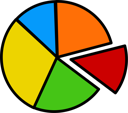

In [ ]:
download_url(images[-1], "pie.jpg", show_progress=False)
image = Image.open("pie.jpg")
image.to_thumb(128, 128)

In [ ]:
data_path = Path(f"data_v{VERSION}")
if not data_path.exists():
  data_path.mkdir()

for label in chart_labels:
  dest = data_path / label
  if not dest.exists():
    dest.mkdir()

  try:
    # image_urls = search_images(label, max_images=200) # custom API search
    image_urls = search_images_ddg(label) # fastbook search function
    download_images(dest, urls=image_urls)
  except:
    continue

In [ ]:
image_paths = get_image_files(data_path)
image_paths

(#5017) [Path('data_v2/pie chart/840e424a-031b-486a-ba01-576932102d8f.jpg'),Path('data_v2/pie chart/a82ad32d-13ba-4f0e-aea8-9deb1fc8422b.png'),Path('data_v2/pie chart/97f09778-d7e6-4a5f-b631-4ad356de1187.jpg'),Path('data_v2/pie chart/02c4e16d-4edb-4d6c-8341-be564895bbfd.jpg'),Path('data_v2/pie chart/5b37727b-ffa8-4a72-a52f-f1569f710464.jpg'),Path('data_v2/pie chart/f5ed054b-66bd-4b93-8f31-4b0d2c71f06a.png'),Path('data_v2/pie chart/cbfe6129-834e-47da-9b2d-95e39eb27ff2.jpg'),Path('data_v2/pie chart/2c5990af-d57e-44d4-8a17-420a827e66af.jpg'),Path('data_v2/pie chart/98952bce-46d7-4a17-b9e3-fbb23e4508a7.png'),Path('data_v2/pie chart/548944f7-36d3-486a-aced-b2b15bf29a6c.png')...]

In [ ]:
failed_images = verify_images(image_paths)
failed_images

(#146) [Path('data_v2/pie chart/0fe0f783-82ec-4e82-b0dd-a9984b55c094.png'),Path('data_v2/pie chart/259405bf-13b7-4ab2-820d-2fda90f151a3.svg'),Path('data_v2/pie chart/74210433-5f5d-4c9f-927d-3147ac76786a.jpg'),Path('data_v2/pie chart/790eea4a-4ebc-41a3-82af-c2af9593bbba.png'),Path('data_v2/pie chart/92f3d06c-d22b-472a-84fe-c024ee9d2581.png'),Path('data_v2/pie chart/c05f0254-6d32-4d8c-9feb-64d3e0f148fe.jpg'),Path('data_v2/pie chart/d6027776-6f39-4fe2-9739-189c483d6cef.jpg'),Path('data_v2/pie chart/1b3c7d4d-927b-47e0-9db8-f98a7164ccad.png'),Path('data_v2/pie chart/2a55ea23-b006-4a34-af17-2d2aed3d52c9.png'),Path('data_v2/pie chart/26572380-bf50-45e0-afa0-7390ad88e177.jpg')...]

In [ ]:
failed_images.map(Path.unlink)

(#146) [None,None,None,None,None,None,None,None,None,None...]

### DataLoaders

In [ ]:
doc(DataBlock)

In [ ]:
class PILImageRGB(PILImage): _show_args,_open_args = {'cmap':'Viridis'},{'mode': 'RGB'}

In [ ]:
data_block = DataBlock(
    blocks=(ImageBlock(cls=PILImageRGB), CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.1, seed=1),
    get_y=parent_label,
    item_tfms=Resize(128)
)

In [ ]:
dls = data_block.dataloaders(data_path, bs=BATCH_SIZE)

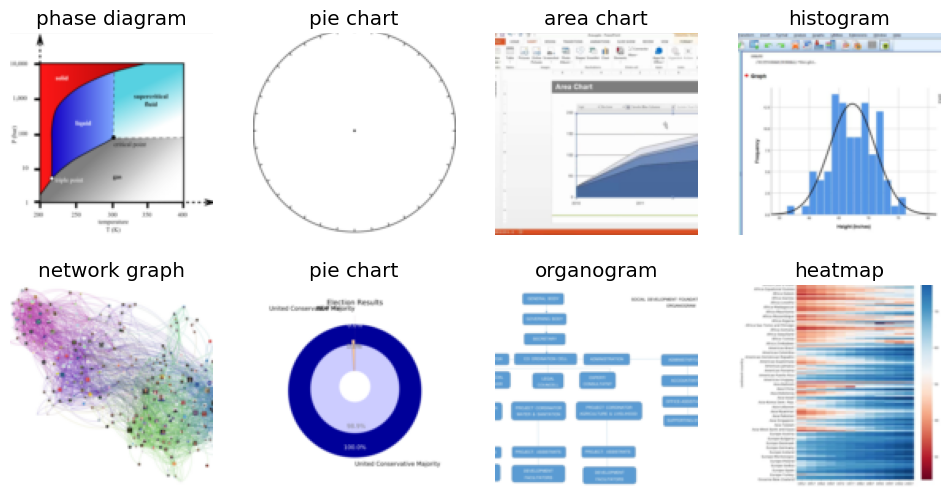

In [ ]:
dls.train.show_batch(max_n=8, nrows=2)

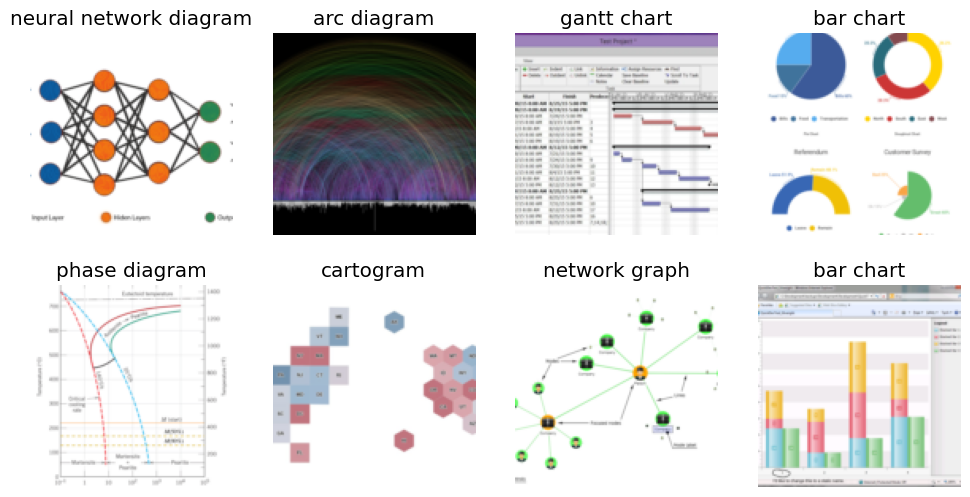

In [ ]:
dls.valid.show_batch(max_n=8, nrows=2)

### Data Augmentation

In [ ]:
doc(aug_transforms)

In [ ]:
data_block = data_block.new(item_tfms=RandomResizedCrop(128, min_scale=0.2), batch_tfms=aug_transforms())
dls = data_block.dataloaders(data_path, bs=BATCH_SIZE)

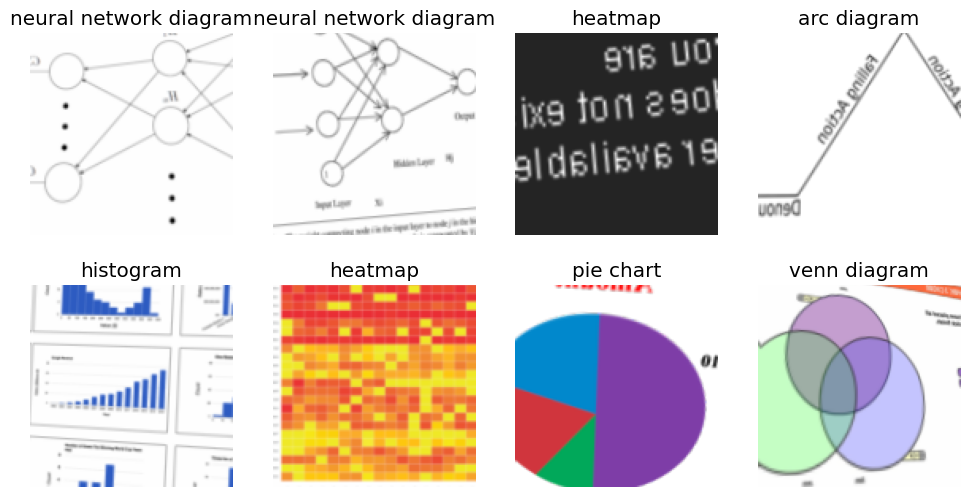

In [ ]:
dls.train.show_batch(max_n=8, nrows=2)

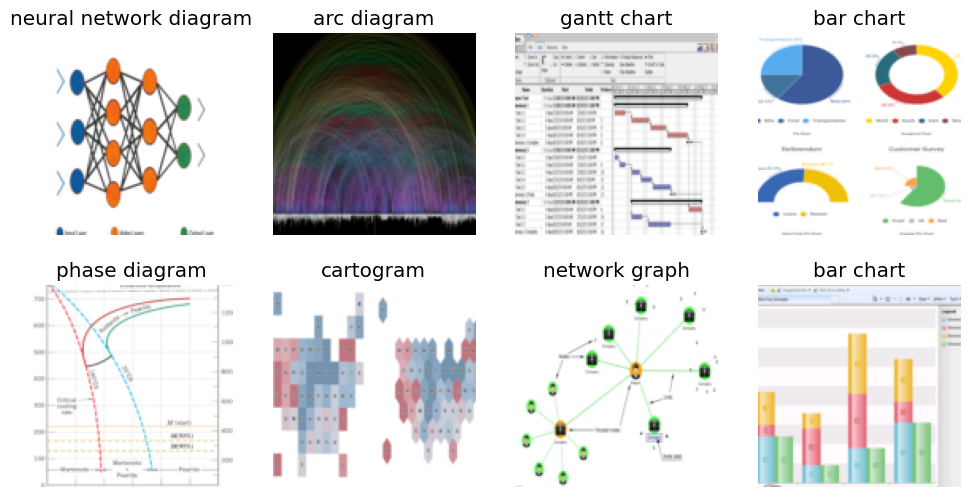

In [ ]:
dls.valid.show_batch(max_n=8, nrows=2)

Save

In [ ]:
torch.save(dls, f"dataloaders/charts_dataloader_v{VERSION}.pkl")